In [3]:
!pip install xgboost
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import pickle

dataset = pd.read_csv("Data.csv", sep ="\t")
dataset["Age"] = 2022 - dataset["Year_Birth"]
dataset = dataset.drop(["Year_Birth","ID","Education","Marital_Status","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Z_CostContact","Z_Revenue","Response","Dt_Customer","NumWebVisitsMonth","Complain","Recency", "Teenhome","Kidhome"], axis=1)
dataset = dataset[dataset["Income"].between(15000, 200000)]
dataset = dataset[dataset["Age"].between(18,100)]
dataset = dataset.fillna(0)
dataset.info()


def actual_vs_predicted_plot(y_true, y_pred):
    import numpy as np
    import matplotlib.pyplot as plt
    min_value=np.array([np.array(y_true.min()), y_pred.min()]).min()
    max_value=np.array([np.array(y_true.max()), y_pred.max()]).max()
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(y_true,y_pred, color= "crimson")
    ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="Black")
    ax.set_title("Actual vs Predicted Plot")
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2160 non-null   float64
 1   MntWines             2160 non-null   int64  
 2   MntFruits            2160 non-null   int64  
 3   MntMeatProducts      2160 non-null   int64  
 4   MntFishProducts      2160 non-null   int64  
 5   MntSweetProducts     2160 non-null   int64  
 6   MntGoldProds         2160 non-null   int64  
 7   NumDealsPurchases    2160 non-null   int64  
 8   NumWebPurchases      2160 non-null   int64  
 9   NumCatalogPurchases  2160 non-null   int64  
 10  NumStorePurchases    2160 non-null   int64  
 11  Age                  2160 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 219.4 KB


7117.69882515182 0.11453295235871368


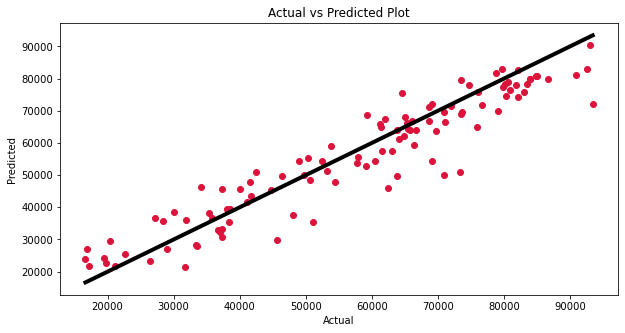

In [8]:
y = dataset["Income"]
X = dataset.drop(["Income"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05) 

In [ ]:
regforestGS = RandomForestRegressor(n_estimators = 2000).fit(X_train,y_train)

params = { 'max_depth': range(1,20),
           'n_estimators': range(0, 2000, 100)}

improved2 = GridSearchCV(regforestGS, params, cv=5)

improved2.fit(X_train, y_train)
improved2.best_params_

In [ ]:
regforest = RandomForestRegressor(random_state=1, max_depth = 17, n_estimators = 500).fit(X_train,y_train)

predicitons = regforest.predict(X_test)

print(mean_squared_error(y_test, predicitons, squared=False), mean_absolute_percentage_error(y_test, predicitons))
actual_vs_predicted_plot(y_test, predicitons)

In [4]:
filename = 'finalized_extended_income_model.sav'
pickle.dump(regforest, open(filename, 'wb'))

In [5]:
dataset.loc[X_train.index,:].to_csv("data.csv", index=False)
dataset.loc[X_test.index,:].drop("Income", axis=1).to_csv("guineapigs.csv", index=False)

guinea_pigs = pd.read_csv("guineapigs.csv")

loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(guinea_pigs)

array([67411.87816286, 75408.04785126, 25842.16      , 68647.24718048,
       38470.10741162, 47701.6996518 , 59459.16257202, 57018.34381552,
       32146.69827501, 65813.94359167, 88965.43      , 61657.48362667,
       63416.50733333, 68484.95320792, 31690.45390324, 21615.32032294,
       27381.44639649, 77744.71473159, 24090.12239603, 55579.46130556,
       38657.99908206, 47031.17655654, 77036.9197644 , 60209.93345455,
       79581.3135788 , 34724.50873318, 78604.36368078, 23271.34766667,
       43397.22230094, 51146.25939947, 75919.54670413, 29650.1222513 ,
       29324.39818869, 45532.19831168, 70179.98760489, 64850.09073777,
       55260.47565294, 65030.33610094, 78177.33510579, 78475.47286354,
       61168.77356605, 77561.68166298, 52270.666     , 58495.91829021,
       33346.4332998 , 25639.16465079, 44718.41967908, 60364.1317381 ,
       76813.69262103, 73822.62038095, 70612.67462235, 72596.94548095,
       70010.9805442 , 48121.76560608, 66096.68865162, 34724.98489869,
      